In [2]:
import pandas
from pymatgen.core import Composition
from s4.thermo.exp.freed import database

table = pandas.read_csv('FixCO3.csv', index_col=0).drop(columns='Exp enthalpy')
table['Exp enthalpy (298K)'] = table.compositions.apply(lambda x: database.dhf(x, 298, unit='ev/atom', allow_extrapolate=False))
table['Exp enthalpy (0K)'] = table.compositions.apply(lambda x: database.dhf(x, 0, unit='ev/atom', allow_extrapolate=True))

c_energy = -9.2268
o_energy = -4.9480
amt_metal = table.compositions.apply(lambda comp: next(y for x, y in Composition(comp).items() if str(x) not in {'O', 'C'}))
calc_enthalpy = table['MP corrected energy'] - table['Calc element energy'] * amt_metal - c_energy - 3*o_energy
calc_enthalpy /= table['compositions'].apply(lambda x: sum(Composition(x).values()))
table['Calc enthalpy (298K)'] = calc_enthalpy + 0.0913
table['Calc enthalpy (0K)'] = calc_enthalpy

table

,compositions,Exp oxide enthalpy,Calc energy,Calc oxide energy,Calc element energy,MP corrected energy,Exp enthalpy (298K),Exp enthalpy (0K),Calc enthalpy (298K),Calc enthalpy (0K)
0,Ag2CO3,-0.321762,-34.236670,-11.596028,-2.832529,-36.343540,-0.873650,-0.553823,-1.009980,-1.101280
1,BaCO3,-5.679830,-37.346707,-12.529482,-1.918971,-39.453577,-2.509783,-2.459059,-2.601461,-2.692761
2,CaCO3,-6.582237,-37.457163,-13.580223,-1.999463,-39.564033,-2.503508,-2.449875,-2.607454,-2.698754
3,CdCO3,-2.675565,-31.748640,-8.615564,-0.906203,-33.855510,-1.573342,-1.513017,-1.684401,-1.775701
4,Cs2CO3,-3.585777,-36.209040,-10.319274,-0.895402,-38.315910,-1.960419,-1.914331,-1.984418,-2.075718
5,FeCO3,-2.818666,-37.174598,-16.873311,-8.469297,-42.014468,-1.537870,-1.285132,-1.803574,-1.894874
6,K2CO3,-3.523767,-36.934792,-10.927620,-1.110399,-39.041662,-1.986800,-2.144628,-2.033711,-2.125011
7,Li2CO3,-6.196730,-39.318036,-14.965890,-1.908923,-41.424906,-2.100565,-2.000797,-2.164743,-2.256043
8,MgCO3,-6.234023,-35.854454,-12.669711,-1.596896,-37.961324,-2.307322,-2.327272,-2.367426,-2.458726
9,MnCO3,-3.992533,-39.572804,-18.096554,-9.161706,-43.360524,-1.842285,-1.774903,-1.934304,-2.025604


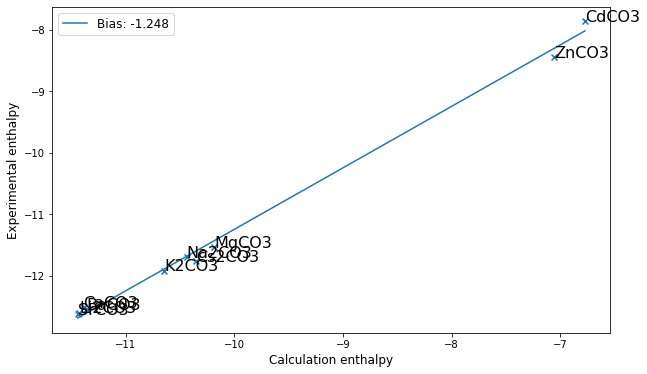

CO3(-2) fitted correction -1.2485


,compositions,Exp oxide enthalpy,Calc energy,Calc oxide energy,Calc element energy,MP corrected energy,Exp enthalpy (298K),Exp enthalpy (0K),Calc enthalpy (298K),Calc enthalpy (0K)
1,BaCO3,-5.679830,-37.346707,-12.529482,-1.918971,-39.453577,-2.509783,-2.459059,-2.601461,-2.692761
2,CaCO3,-6.582237,-37.457163,-13.580223,-1.999463,-39.564033,-2.503508,-2.449875,-2.607454,-2.698754
3,CdCO3,-2.675565,-31.748640,-8.615564,-0.906203,-33.855510,-1.573342,-1.513017,-1.684401,-1.775701
4,Cs2CO3,-3.585777,-36.209040,-10.319274,-0.895402,-38.315910,-1.960419,-1.914331,-1.984418,-2.075718
6,K2CO3,-3.523767,-36.934792,-10.927620,-1.110399,-39.041662,-1.986800,-2.144628,-2.033711,-2.125011
7,Li2CO3,-6.196730,-39.318036,-14.965890,-1.908923,-41.424906,-2.100565,-2.000797,-2.164743,-2.256043
8,MgCO3,-6.234023,-35.854454,-12.669711,-1.596896,-37.961324,-2.307322,-2.327272,-2.367426,-2.458726
10,Na2CO3,-4.323401,-37.132868,-11.923338,-1.312223,-39.239738,-1.950522,-2.125841,-1.999449,-2.090749
12,SrCO3,-6.120409,-37.201105,-12.806926,-1.689481,-39.307975,-2.526261,-2.520749,-2.618239,-2.709539
14,ZnCO3,-3.632264,-32.383683,-9.804735,-1.259461,-34.490553,-1.689557,-1.763316,-1.740758,-1.832058


In [4]:
from pymatgen.core import Composition
import matplotlib.pyplot as plt
from scipy import optimize

c_energy = -9.2268
o_energy = -4.9480

sub_table = table
# sub_table = table.loc[table.compositions.apply(lambda x: x not in {'FeCO3', 'MnCO3', 'CdCO3', 'PbCO3', 'Tl2CO3', 'ZnCO3', 'Ag2CO3'})]
sub_table = sub_table.loc[table.compositions.apply(lambda x: x not in {'FeCO3', 'MnCO3'})]
sub_table = sub_table.loc[table.compositions.apply(lambda x: x not in {'PbCO3', 'Tl2CO3', 'Ag2CO3'})]

amt_metal = sub_table.compositions.apply(lambda comp: next(y for x, y in Composition(comp).items() if str(x) not in {'O', 'C'}))
y = sub_table['Exp enthalpy (298K)']*sub_table['compositions'].apply(lambda x: sum(Composition(x).values()))
x = sub_table['Calc energy'] - sub_table['Calc element energy'] * amt_metal - c_energy - 3*o_energy
# x = sub_table['MP corrected energy'] - sub_table['Calc element energy'] * amt_metal - c_energy - 3*o_energy

def ufunc(x, bias):
    return x + bias

popt, pcov = optimize.curve_fit(ufunc, x, y)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='x')
_min, _max = min(x), max(x)
plt.plot([_min, _max], [_min+popt, _max+popt], 
         label='Bias: %.3f' % (popt,))
for i in range(len(sub_table)):
    plt.text(x.values[i], y.values[i], sub_table.iloc[i].compositions, fontsize=16)
plt.xlabel('Calculation enthalpy', fontsize=12)
plt.ylabel('Experimental enthalpy', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

fix_co3 = popt
print('CO3(-2) fitted correction %.4f' % fix_co3)
sub_table